In [141]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 

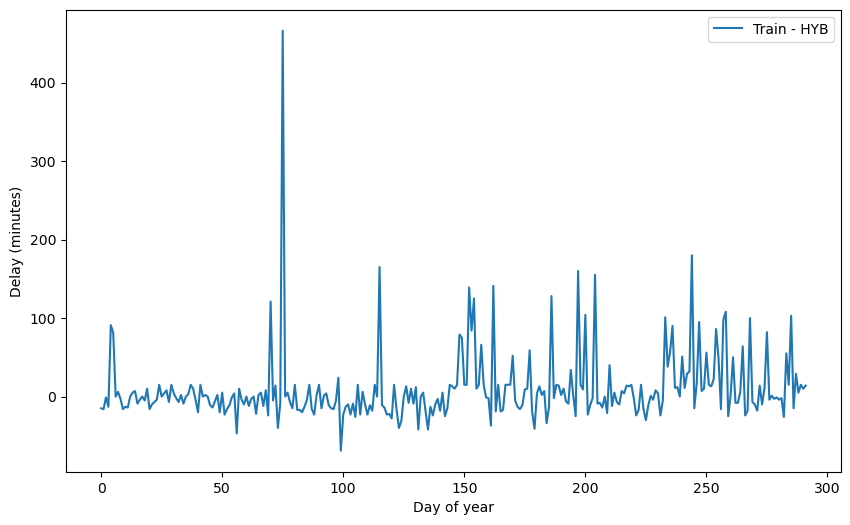

In [117]:
# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

target = data[['HYB']]
features = data.drop(['HYB'], axis=1)

train_size = 0.8  # Use 80% of the data for training
train_features, test_features = train_test_split(features, train_size=train_size, shuffle=False)
train_target, test_target = train_test_split(target, train_size=train_size, shuffle=False)



plt.figure(figsize=(10, 6))
plt.plot(train_target.index, train_target, label='Train - HYB')
plt.legend()
plt.xlabel('Day of year')
plt.ylabel('Delay (minutes)')
plt.show()

In [119]:
ts_decomposition = seasonal_decompose(x=train_target, model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

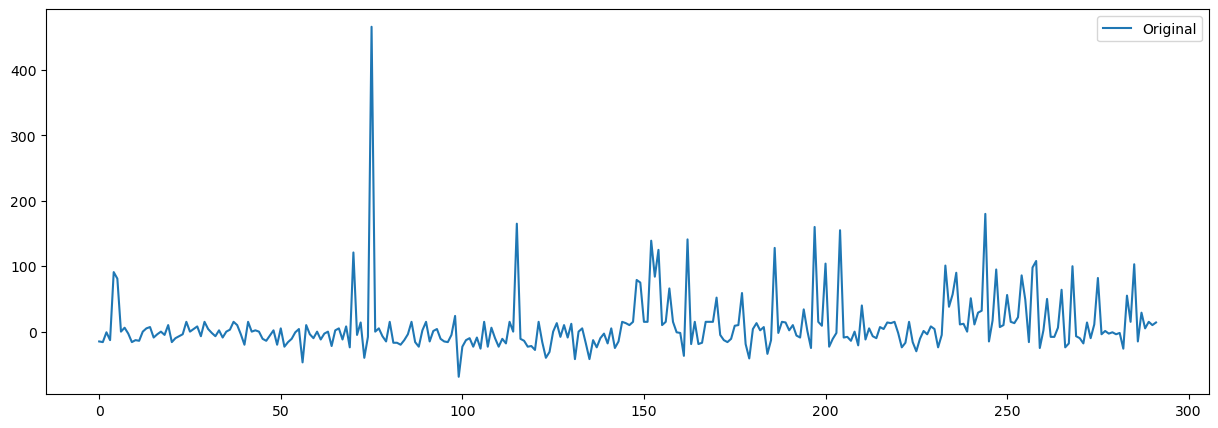

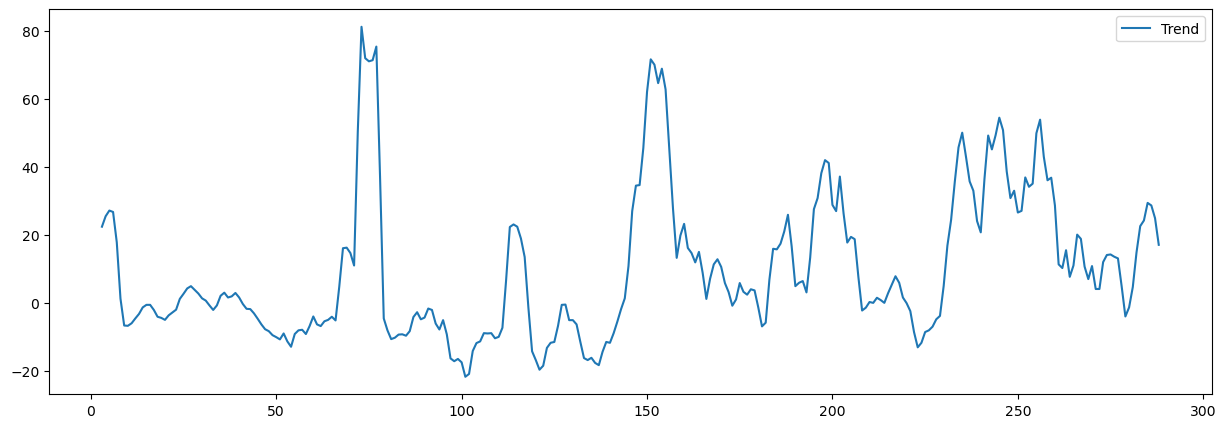

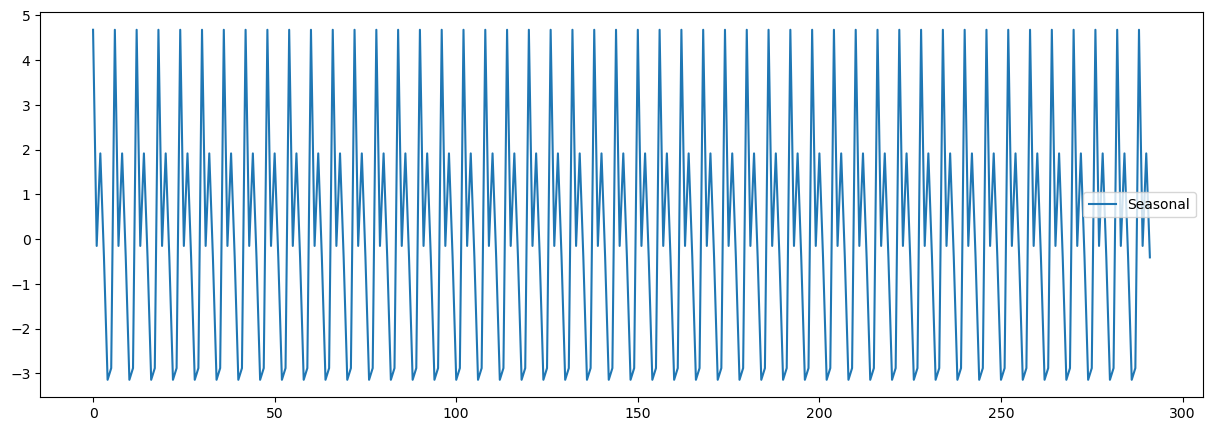

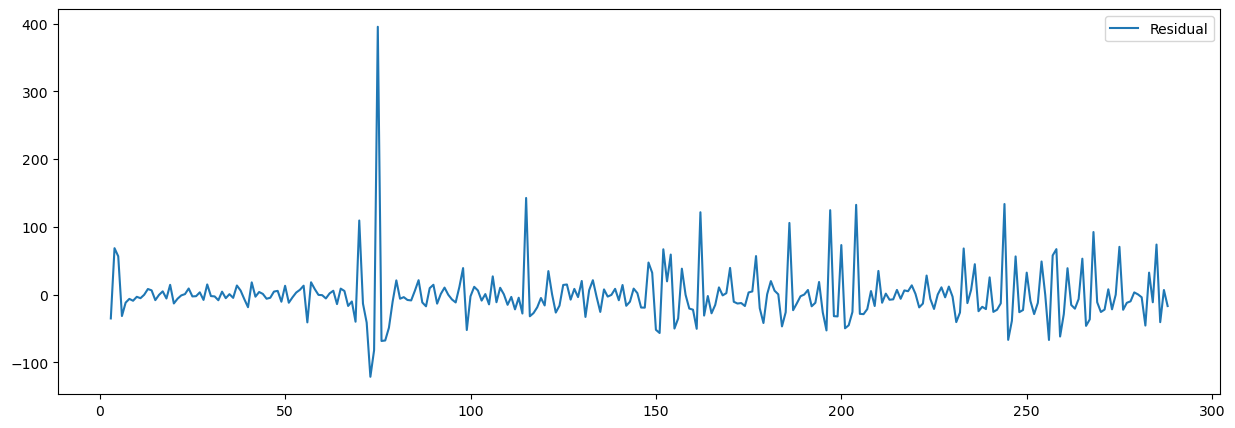

In [121]:
plt.figure(figsize=(15,5))
plt.plot(train_target, label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

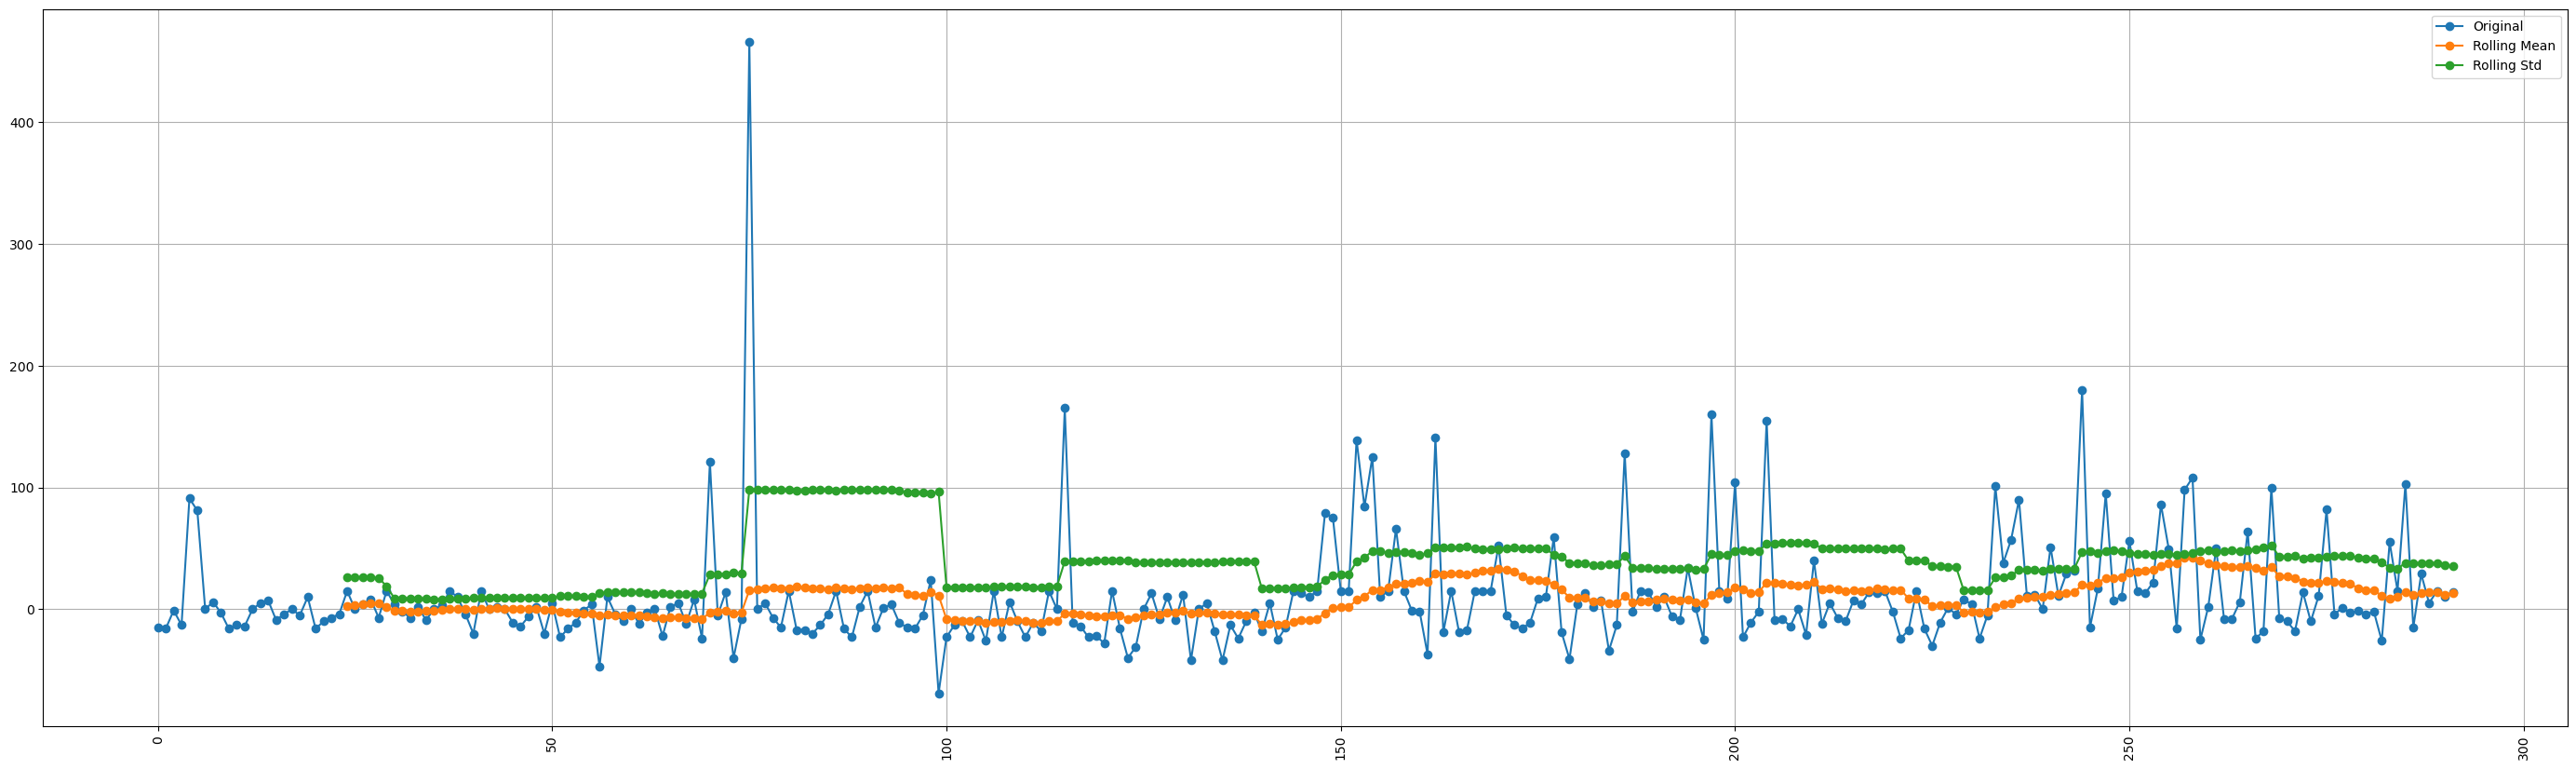

In [123]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train_target, marker='o', label='Original')
plt.plot(train_target.rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train_target.rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [125]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [127]:
# ADF Test on each column
for name, column in train_features.items():
    # Check if the column is constant
    if column.nunique() <= 1:  # or column.std() == 0
        print(f'Skipping {name} as it is constant.')
        continue  # Skip this column
    
    print(f"Checking stationarity for: {name}")
    check_stationarity(column, name=name)
    print('\n')


Checking stationarity for: VSKP
    Augmented Dickey-Fuller Test on "VSKP" 
    -----------------------------------------------
ADF Statistic: -8.866565
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Stationary


Checking stationarity for: Temperature_1
    Augmented Dickey-Fuller Test on "Temperature_1" 
    -----------------------------------------------
ADF Statistic: -1.000431
p-value: 0.753107
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Non-stationary


Checking stationarity for: Wind_Speed_1
    Augmented Dickey-Fuller Test on "Wind_Speed_1" 
    -----------------------------------------------
ADF Statistic: -7.267808
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Stationary


Checking stationarity for: weather_code_1
    Augmented Dickey-Fuller Test on "weather_code_1" 
    -----------------------------------------------
ADF Statistic: -5.587318
p-value: 0.000001
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Sta

In [129]:
# ADF Test on each column
for name, column in train_features.diff().dropna().items():
    # Check if the column is constant
    if column.nunique() <= 1:  # or column.std() == 0
        print(f'Skipping {name} as it is constant.')
        continue  # Skip this column
    
    print(f"Checking stationarity for: {name}")
    check_stationarity(column, name=name)
    print('\n')

Checking stationarity for: VSKP
    Augmented Dickey-Fuller Test on "VSKP" 
    -----------------------------------------------
ADF Statistic: -8.485329
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
Stationary


Checking stationarity for: Temperature_1
    Augmented Dickey-Fuller Test on "Temperature_1" 
    -----------------------------------------------
ADF Statistic: -10.846083
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Stationary


Checking stationarity for: Wind_Speed_1
    Augmented Dickey-Fuller Test on "Wind_Speed_1" 
    -----------------------------------------------
ADF Statistic: -8.763350
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
Stationary


Checking stationarity for: weather_code_1
    Augmented Dickey-Fuller Test on "weather_code_1" 
    -----------------------------------------------
ADF Statistic: -8.100107
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
Statio

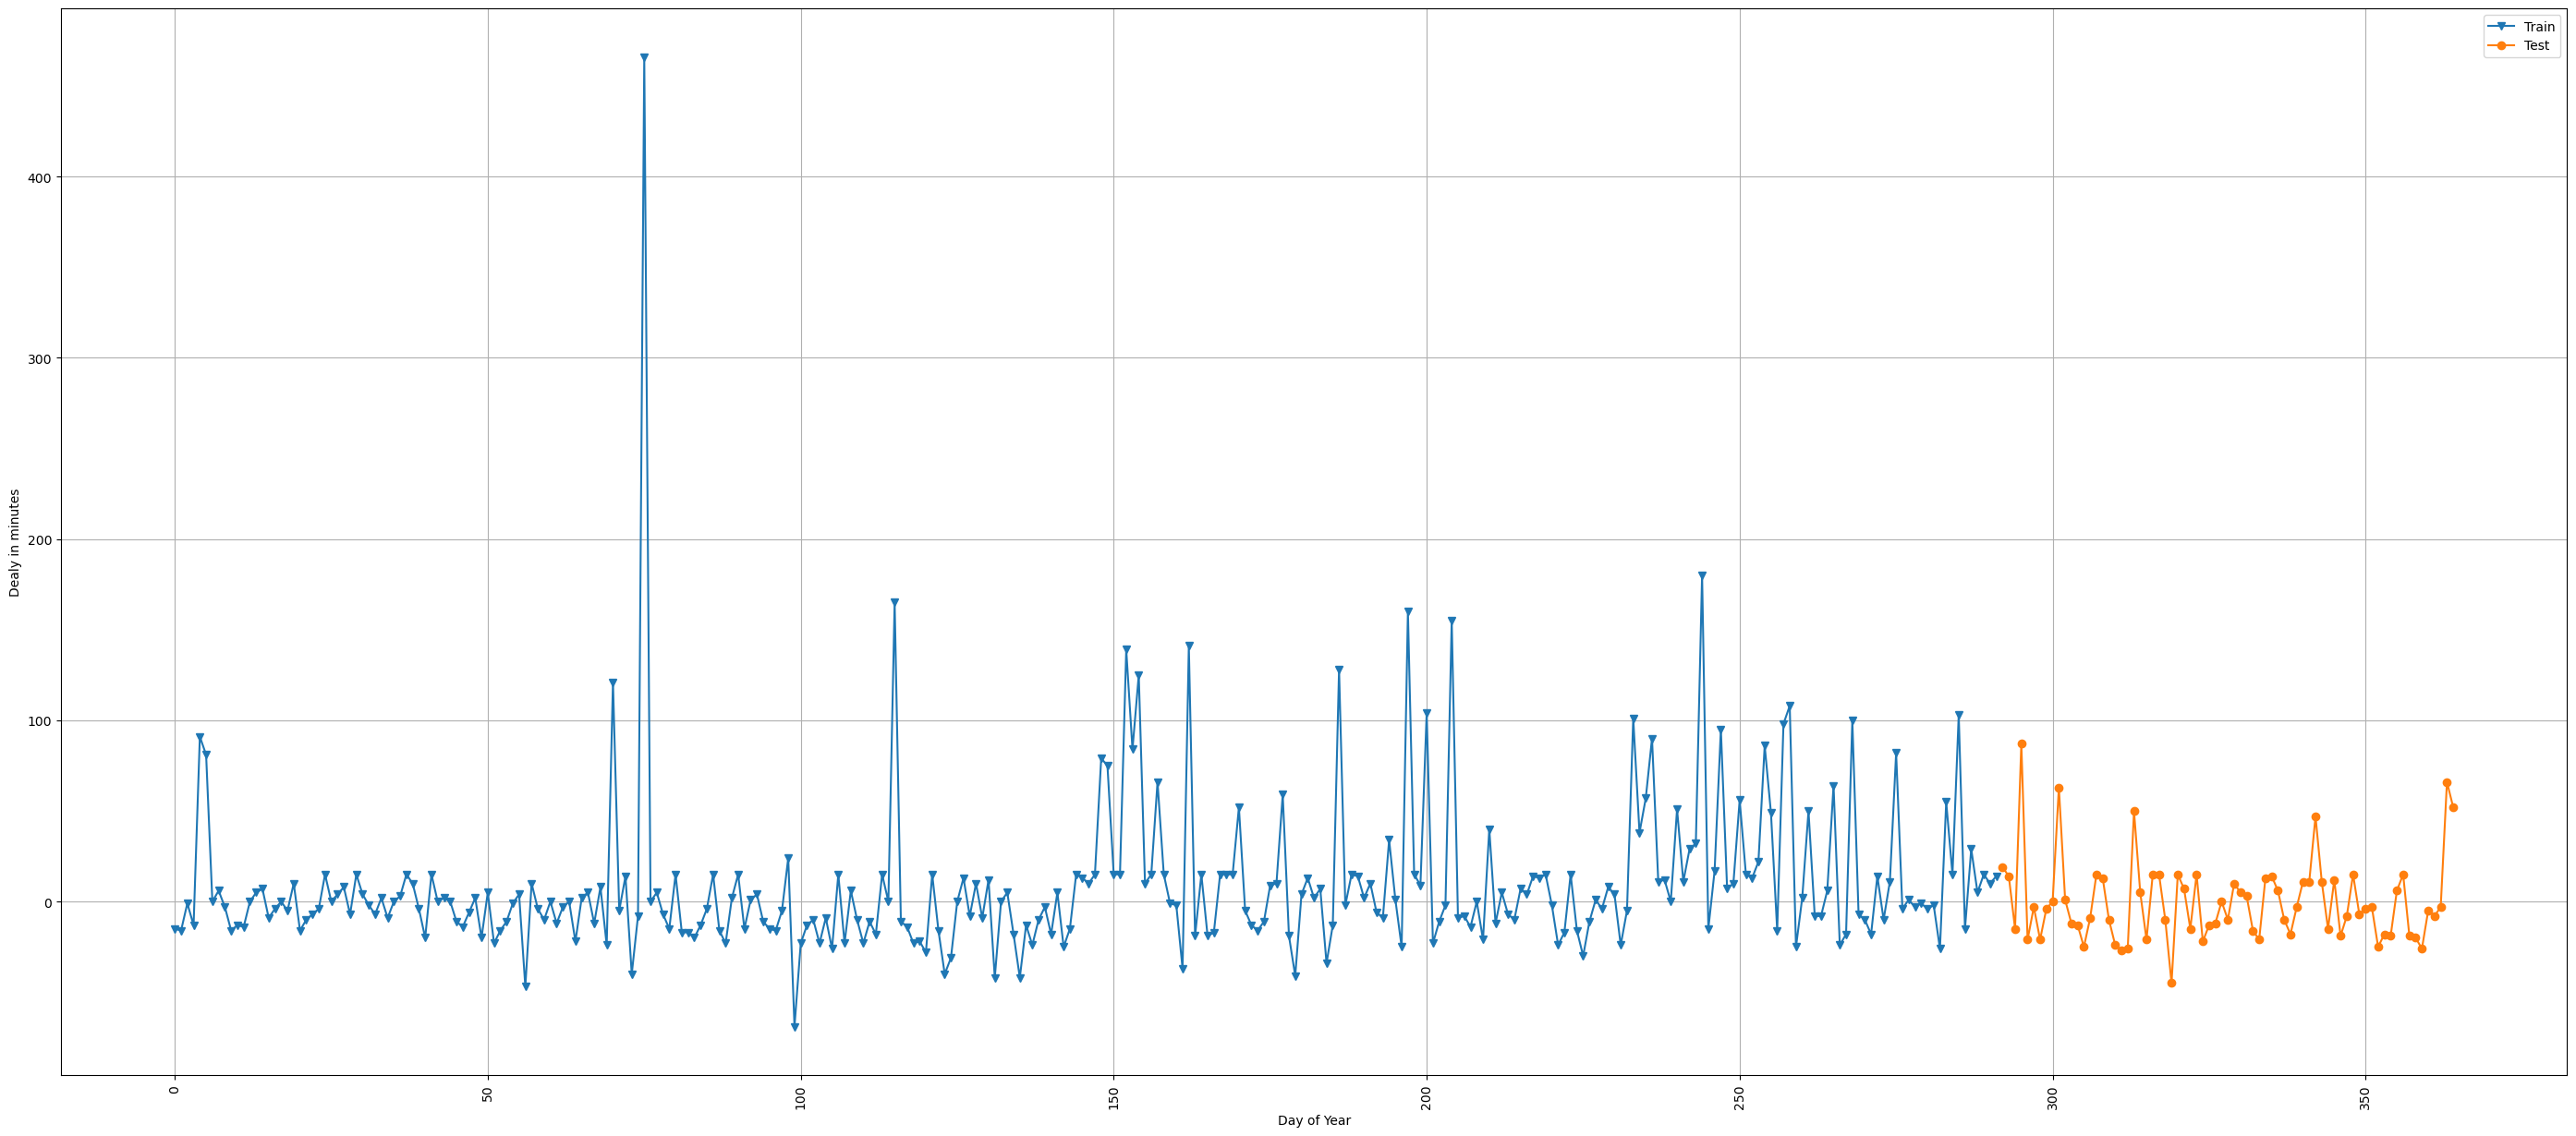

In [131]:
plt.figure(figsize=(35,15))
plt.grid()
plt.plot(train_target, marker='v', label='Train')
plt.plot( test_target, marker='o', label='Test')
plt.xticks(rotation=90)
plt.xlabel("Day of Year")
plt.ylabel("Dealy in minutes")
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=2887.880, Time=11.40 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=3338.564, Time=0.85 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=3191.755, Time=10.82 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=8.98 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=inf, Time=10.66 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=inf, Time=19.41 sec
 ARIMA(2,2,2)(2,0,1)[4]             : AIC=inf, Time=21.05 sec
 ARIMA(2,2,2)(1,0,2)[4]             : AIC=inf, Time=18.93 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=2888.444, Time=10.54 sec
 ARIMA(2,2,2)(0,0,2)[4]             : AIC=inf, Time=19.68 sec
 ARIMA(2,2,2)(2,0,0)[4]             : AIC=inf, Time=17.27 sec
 ARIMA(2,2,2)(2,0,2)[4]             : AIC=inf, Time=19.91 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=inf, Time=17.32 sec
 ARIMA(2,2,1)(1,0,1)[4]             : AIC=inf, Time=11.90 sec
 ARIMA(3,2,2)(1,0,1)[4]             : AIC=inf, Time=11.63 sec
 ARIMA(2,

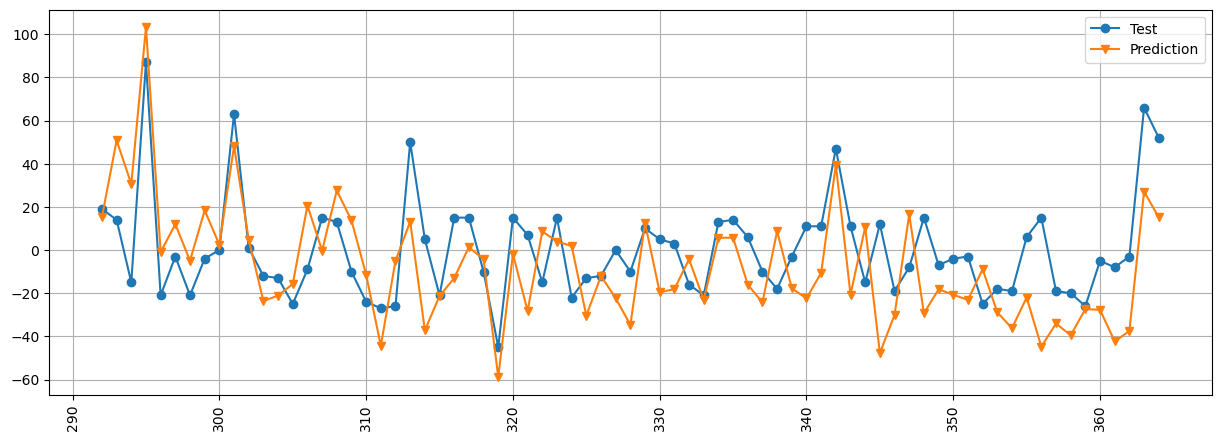

Mean Absolute Percentage Error 1526517394456185.2
Mean Squared Error 570.2657389740107
RMSE 23.880237414523556
AIC values 2887.880288346366
R2 score:  -0.057133577228299925


In [165]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train_target,X=train_features, d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# # Print out summary information on the fit
# print(arima.summary())
# print(arima.params)

pred=arima.predict(n_periods=73, X=test_features, alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(test_target, marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test_target, pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test_target, pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
r2 = r2_score(test_target, pred)
print('R2 score: ',r2)
print("="*50)


In [163]:
a=pd.DataFrame(test_target)
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['HYB']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
print(output)


    Test  Prediction  Difference     % Chnage
0     19   15.284248    3.715752    19.556590
1     14   50.787259  -36.787259   262.766139
2    -15   30.614280  -45.614280   304.095199
3     87  103.253371  -16.253371    18.682036
4    -21   -0.948924  -20.051076    95.481315
..   ...         ...         ...          ...
68    -5  -27.709407   22.709407   454.188140
69    -8  -42.373506   34.373506   429.668822
70    -3  -37.465927   34.465927  1148.864246
71    66   27.089699   38.910301    58.955002
72    52   15.166808   36.833192    70.833061

[73 rows x 4 columns]
R2 score:  -0.057133577228299925


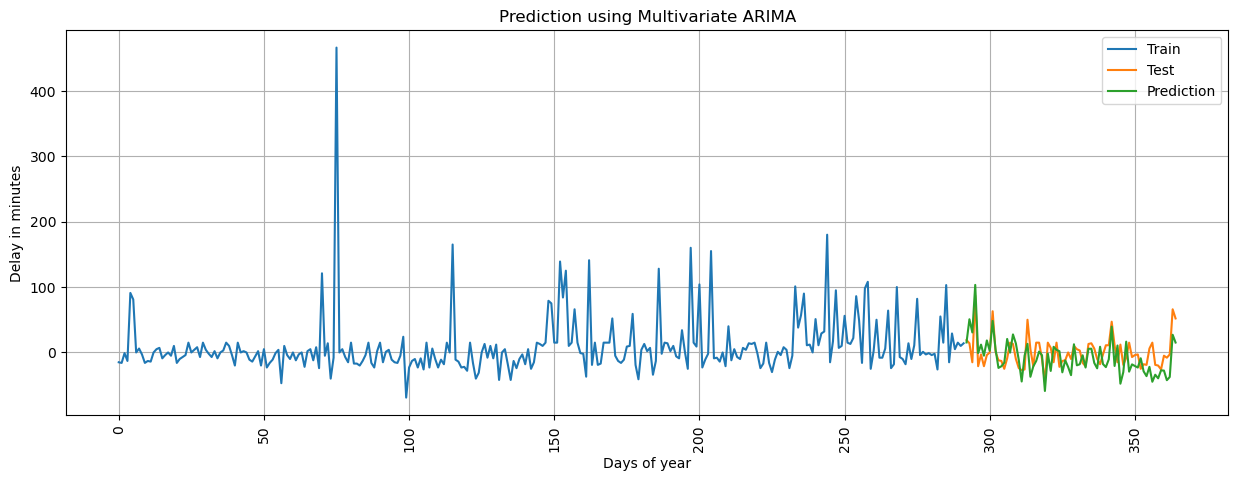

In [161]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train_target, label = 'Train')
plt.plot(test_target, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.xlabel("Days of year")
plt.ylabel("Delay in minutes")
plt.title("Prediction using Multivariate ARIMA")
plt.xticks(rotation=90)
plt.show()